<a href="https://colab.research.google.com/github/mathi0405/OIBSIP/blob/main/Iris%20Flower%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.shape

(150, 6)

In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df=data.groupby('Species')

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [10]:
df['Species'].unique()

Species
Iris-setosa            [Iris-setosa]
Iris-versicolor    [Iris-versicolor]
Iris-virginica      [Iris-virginica]
Name: Species, dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7f38abead430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f38abead9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f38abead190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f38abeadf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f38abebf280>],
 'means': []}

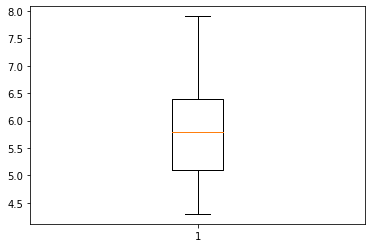

In [12]:
plt.boxplot(data['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f38a9547400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f38a95479a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f38a9547130>],
 'medians': [<matplotlib.lines.Line2D at 0x7f38a9547f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f38a9553250>],
 'means': []}

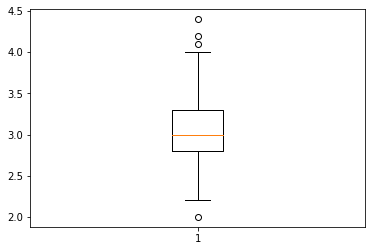

In [13]:
plt.boxplot(data['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f38a952a9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f38a952af40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f38a952a6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f38a9538520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f38a95387f0>],
 'means': []}

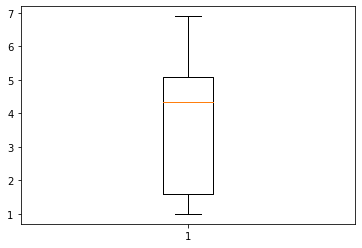

In [14]:
plt.boxplot(data['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f38a94977f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f38a9497d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f38a9497520>],
 'medians': [<matplotlib.lines.Line2D at 0x7f38a94a7370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f38a94a7640>],
 'means': []}

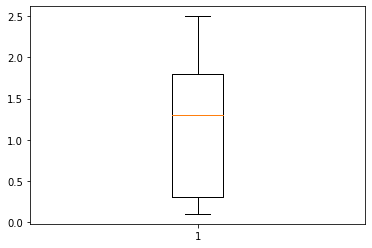

In [15]:
plt.boxplot(data['PetalWidthCm'])

<AxesSubplot:>

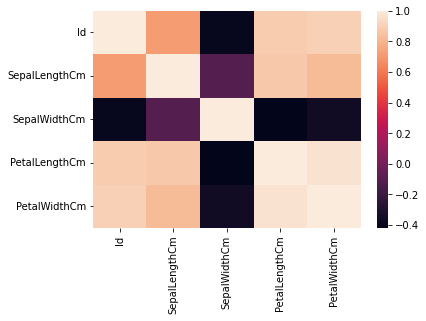

In [16]:
sns.heatmap(data.corr())  #collinearity

In [17]:
data.drop('Id',axis=1,inplace=True)

In [18]:
sp={'Iris-setosa':1,
    'Iris-versicolor':2,
    'Iris-virginica':3}

In [19]:
data.Species=[sp[i] for i in data.Species]

In [20]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [21]:
A=data.iloc[:,0:4]

In [22]:
A

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
 B=data.iloc[:,4]
 B

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [24]:
train_data, test_data = train_test_split(data, test_size=0.33, random_state=42)


In [25]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

In [26]:
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [27]:
X=X_train + y_train
y=X_test + y_test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [29]:
model=LinearRegression()

In [30]:
model.fit(A,B)

LinearRegression()

In [31]:
model.score(A,B)

0.9304223675331595

In [32]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [33]:
model.intercept_

1.192083994828139

In [34]:
y_pred=model.predict(X_test)

In [35]:
print(np.mean((y_pred-y_test)**2))

0.03457234692139822
